In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

WIND_X = 800
WIND_Y = 500
canvas = cv2.imread("/content/drive/MyDrive/2022-2023/Робофутбол/sahrs_on_the_field.jpg")# [100:500, 200:300, :]

(1280, 720, 3)


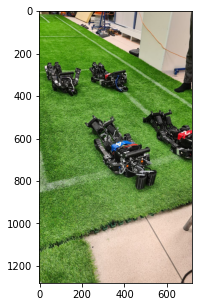

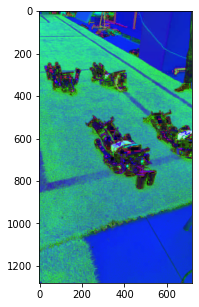

In [5]:
#исходное изображение
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB) #преобразование форматов
print(img.shape)
plt.figure(figsize=(6, 5))
plt.imshow(img)
plt.show()

#изображение преобразованное в HSV
imghsv = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(6, 5))
plt.imshow(imghsv)#, cmap="gray")
plt.show()


#mask = cv2.inRange(mask, (0, 0, 0), (100, 100, 50))

#plt.figure(figsize=(6, 5))
#plt.imshow(mask)#, cmap="gray")
#plt.show()


In [6]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
 
def f(hl, sl, vl, hh, sh, vh):
    mask = cv2.inRange(imghsv, (hl, sl, vl), (hh, sh, vh))

    plt.figure (figsize=(10, 8))
    plt.imshow (mask, cmap="gray")
    plt.show ()
    plt.pause (0.05)
    plt.clf ()
 
interactive_plot = interactive(f, hl = (0, 255, 1), sl = (0, 255, 1), vl = (0, 255, 1),
                               hh = (0, 255, 1), sh = (0, 255, 1), vh = (0, 255, 1))
 
output = interactive_plot.children[-1]
output.layout.height = str (WIND_Y) + 'px'
output.layout.width = str (WIND_X) + 'px'
interactive_plot

interactive(children=(IntSlider(value=127, description='hl', max=255), IntSlider(value=127, description='sl', …

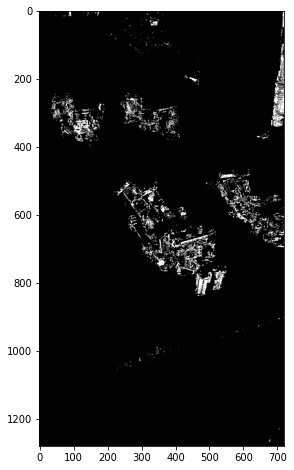

In [82]:
mask1 = cv2.inRange(imghsv, (12, 0, 22), (59, 64, 68))
plt.figure(figsize=(10, 8))
plt.imshow(mask1, cmap="gray")
plt.show()

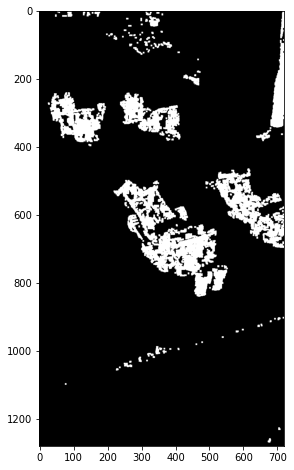

In [83]:
kernel = np.ones((5,5),np.uint8)
mask2 = cv2.dilate(mask1, kernel,iterations = 1)
plt.figure(figsize=(10, 8))
plt.imshow(mask2, cmap="gray")
plt.show()

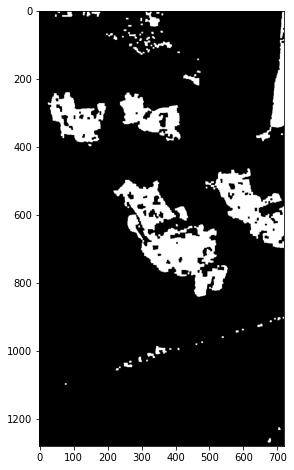

In [84]:
kernel = np.ones((5,5),np.uint8)
mask3 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(10, 8))
plt.imshow(mask3, cmap="gray")
plt.show()

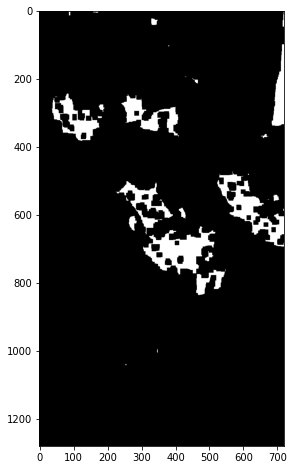

In [88]:
kernel = np.ones((5,5),np.uint8)
mask4 = cv2.erode(mask3,kernel,iterations = 2)
plt.figure(figsize=(10, 8))
plt.imshow(mask4, cmap="gray")
plt.show()

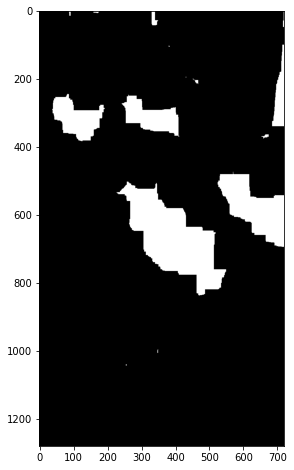

In [91]:
kernel = np.ones((50,50),np.uint8)
mask5 = cv2.morphologyEx(mask4, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(10, 8))
plt.imshow(mask5, cmap="gray")
plt.show()

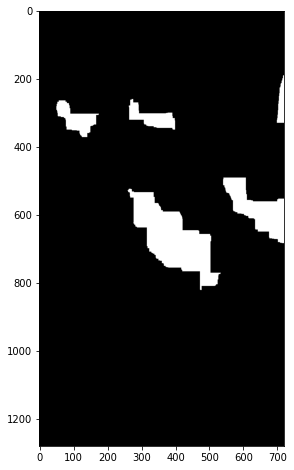

In [93]:
kernel = np.ones((3,3),np.uint8)
mask6 = cv2.erode(mask5,kernel,iterations = 10)
plt.figure(figsize=(10, 8))
plt.imshow(mask6, cmap="gray")
plt.show()

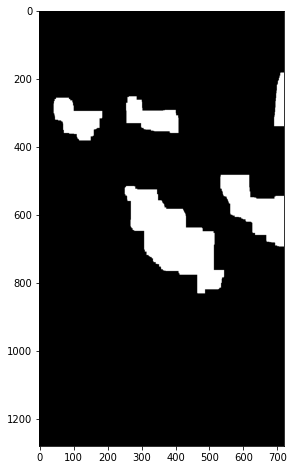

In [120]:
kernel = np.ones((10,10),np.uint8)
mask7 = cv2.dilate(mask6, kernel,iterations = 2)
plt.figure(figsize=(10, 8))
plt.imshow(mask7, cmap="gray")
plt.show()

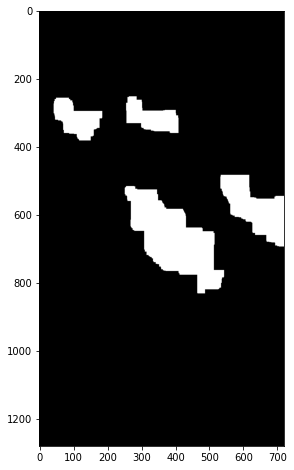

In [122]:
def remove_small_objects(img, min_size=150):
        # find all your connected components (white blobs in your image)
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)
        # connectedComponentswithStats yields every seperated component with information on each of them, such as size
        # the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
        sizes = stats[1:, -1]
        nb_components = nb_components - 1

        # your answer image
        img2 = img
        # for every component in the image, you keep it only if it's above min_size
        for i in range(0, nb_components):
            if sizes[i] < min_size:
                img2[output == i + 1] = 0

        return img2
mask8 = remove_small_objects(mask7, 4000)
plt.figure(figsize=(10, 8))
plt.imshow(mask8, cmap="gray")
plt.show()